# Delphi dataset analysis

In [1]:
import pandas as pd
from random import randint
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize.toktok import ToktokTokenizer
"""from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit"""
pd.set_option('display.max_columns', None)

In [2]:
join = pd.read_csv("datasets/join.csv")

## Dataset exploration

In [3]:
join.head(10)

,ID,Data Campionamento,Totalizzato (m3),Componenti nucleo,STAZIONE,TEMPERATURA MINIMA,TEMPERATURA MASSIMA,UMIDITA MINIMA,UMIDITA MASSIMA,PRECIPITAZIONI (mm),VENTO m/s,DIREZIONE
0,324052,20/08/23 00:00,166.742,1,MANTOVA CAMPO CANOA,28.0,29.3,67,71,0.0,0.6,90
1,324052,20/08/23 01:00,166.742,1,MANTOVA CAMPO CANOA,26.3,28.1,72,78,0.0,0.1,45
2,324052,20/08/23 02:00,166.742,1,MANTOVA CAMPO CANOA,25.1,26.3,78,84,0.0,0.1,45
3,324052,20/08/23 03:00,166.742,1,MANTOVA CAMPO CANOA,24.7,25.2,84,86,0.0,0.0,45
4,324052,20/08/23 04:00,166.742,1,MANTOVA CAMPO CANOA,24.1,24.9,85,87,0.0,0.1,45
5,324052,20/08/23 05:00,166.742,1,MANTOVA CAMPO CANOA,23.7,24.2,87,89,0.0,0.0,45
6,324052,20/08/23 06:00,166.812,1,MANTOVA CAMPO CANOA,23.7,24.2,85,88,0.0,0.1,45
7,324052,20/08/23 07:00,166.812,1,MANTOVA CAMPO CANOA,23.7,23.9,87,89,0.0,0.0,45
8,324052,20/08/23 08:00,166.812,1,MANTOVA CAMPO CANOA,23.8,24.9,85,88,0.0,0.0,45
9,324052,20/08/23 09:00,166.812,1,MANTOVA CAMPO CANOA,25.0,27.5,78,86,0.0,0.0,45


In [4]:
print('Numero di records:', join.shape[0])
print('Numero di colonne:', join.shape[1])

Numero di records: 10720
Numero di colonne: 12


Dataset setup:

In [5]:
join["TEMPERATURA"] = join[["TEMPERATURA MINIMA","TEMPERATURA MASSIMA"]].mean(axis=1)
join["UMIDITA"] = join[["UMIDITA MINIMA","UMIDITA MASSIMA"]].mean(axis=1)
join["TOT PERSONA"] = round(join["Totalizzato (m3)"]/join["Componenti nucleo"], 2)

join.drop(["TEMPERATURA MINIMA","TEMPERATURA MASSIMA","UMIDITA MINIMA","UMIDITA MASSIMA", "VENTO m/s", "DIREZIONE", "STAZIONE"], axis=1, inplace=True)

Check for missing data:

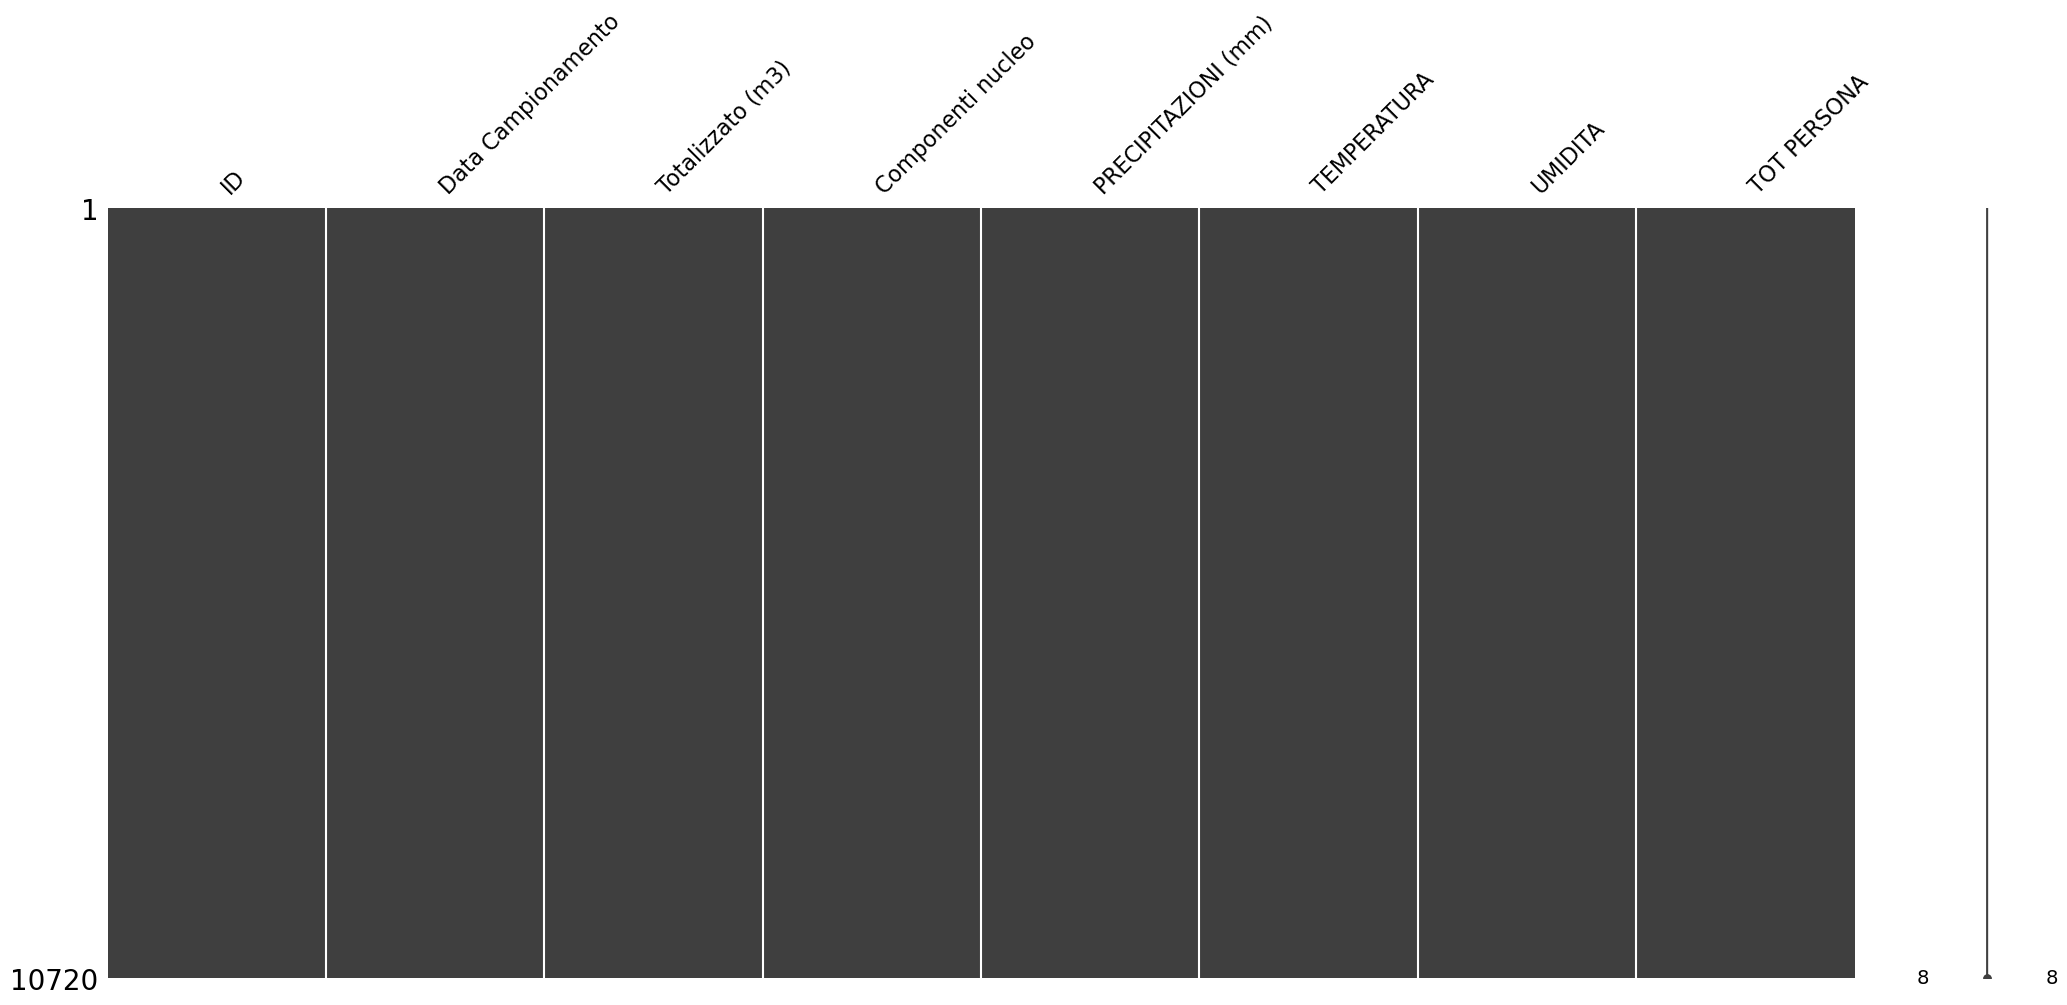

In [6]:
msno.matrix(join);

> No NaN found

> Hypothesis: at the moment, the analysis will only take into account the average temperature, average humidy and rain conditions to semplify the model (in future works the model will be upgraded with other parameters like the wind direction and force)

In [7]:
print(f"Min temperatura: {join['TEMPERATURA'].min()}")
print(f"Max temperatura: {join['TEMPERATURA'].max()}")
print(f"Avg temperatura: {round(join['TEMPERATURA'].mean(), 2)}\n")

Min temperatura: 16.05
Max temperatura: 39.45
Avg temperatura: 26.32



In [8]:
slice_t = (join['TEMPERATURA'].max() - join['TEMPERATURA'].min())/10

range_t = [join['TEMPERATURA'].min()]


print("Temperature:")

t = 0
for i in range(10):
    print(f"Slice {i+1}: from {round(join['TEMPERATURA'].min() + t, 2)} to {round(join['TEMPERATURA'].min() + t + slice_t, 2)}")
    t += slice_t
    range_t.append(round(t+join['TEMPERATURA'].min(), 2))

Temperature:
Slice 1: from 16.05 to 18.39
Slice 2: from 18.39 to 20.73
Slice 3: from 20.73 to 23.07
Slice 4: from 23.07 to 25.41
Slice 5: from 25.41 to 27.75
Slice 6: from 27.75 to 30.09
Slice 7: from 30.09 to 32.43
Slice 8: from 32.43 to 34.77
Slice 9: from 34.77 to 37.11
Slice 10: from 37.11 to 39.45


In [9]:
temp = []

for x in join["TEMPERATURA"]:
    if range_t[0] < round(x, 2) < range_t[1]:
        y = 0
    
    elif range_t[1] < round(x, 2) < range_t[2]:
        y = 1
    
    elif range_t[2] < round(x, 2) < range_t[3]:
        y = 2
    
    elif range_t[3] < round(x, 2) < range_t[4]:
        y = 3

    elif range_t[4] < round(x, 2) < range_t[5]:
        y = 4
    
    elif range_t[5] < round(x, 2) < range_t[6]:
        y = 5
    
    elif range_t[6] < round(x, 2) < range_t[7]:
        y = 6
    
    elif range_t[7] < round(x, 2) < range_t[8]:
        y = 7
    
    elif range_t[8] < round(x, 2) < range_t[9]:
        y = 8
    
    elif range_t[9] < round(x, 2) < range_t[10]:
        y = 9

    temp.append(y)

join["TEMP"] = temp

In [10]:
count_t = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for i in join["TEMP"]:
    count_t[i]+=1

print(f"{count_t}")

{0: 299, 1: 1635, 2: 1503, 3: 1601, 4: 1695, 5: 1329, 6: 1053, 7: 718, 8: 581, 9: 306}
